https://programmers.co.kr/learn/courses/30/lessons/43163?language=python3

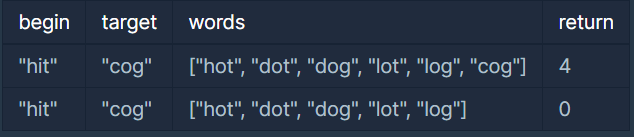

In [1]:
def solution(begin, target, words):
    answer = 0
    # target이 words에 없으면 0 출력
    if target not in words:
        answer = 0
        return answer
    
    words.insert(0, begin)
    # 노드와 간선
    node_dict = {}
    node_dict[begin] = 1
    for i, word in enumerate(words):
        node_dict[word] = i + 1
        
    INF = int(1e9)
    n = len(words)
    graph = [[INF] * (n + 1) for _ in range(n + 1)]
    
    for i in words:
        for j in words:
            # 자기 자신은 거리 0
            if i == j:
                graph[node_dict[i]][node_dict[i]] = 0
                continue
            # edge_test(다른 문자 1개 일때 True) 통과 하면 연결
            if edge_test(i, j):
                graph[node_dict[i]][node_dict[j]] = 1
                graph[node_dict[j]][node_dict[i]] = 1

    for k in range(1, n + 1):
        for a in range(1, n + 1):
            for b in range(1, n + 1):
                graph[a][b] = min(graph[a][b], graph[a][k] + graph[k][b])
    
    distance = graph[node_dict[begin]][node_dict[target]]

    if distance >= 1e9:
        answer = 0
    else:
        answer = distance
    return answer

def edge_test(word1, word2):
    is_diff = 0
    for i, j in zip(word1, word2):
        if i != j:
            is_diff += 1
    if is_diff == 1:
        return True
    else:
        return False

In [2]:
begin = 'hit'
target = 'cog'
words = ["hot", "dot", "dog", "lot", "log", "cog"]
solution(begin, target, words)

4